In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import dsp_helpers as dsp

%matplotlib widget

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (6, 4)


# Distortion

"Distortion is the result of a non-linear characteristic curve, which causes the input signal to be clipped at the output."  
[- Digital Audio Effects - Stanford](https://ccrma.stanford.edu/~orchi/Documents/DAFx.pdf)

In [2]:
sample = "untitled.wav"
Fs, audioData = wavfile.read(sample, 'r')
audioData = dsp.toMono(audioData)
assert audioData.ndim == 1

normalizedSignal = dsp.normalize(audioData)

## Sigmoid function

Soft clipping implementation using a sigmoid table. This implementation was chosen over other common functions like tanh(), because CMSIS DSP provides a q15 sigmoid table.

Function taken as-is from [kaggle.com](https://www.kaggle.com/del=d87afcedfc3c432d/sigmoid-table)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
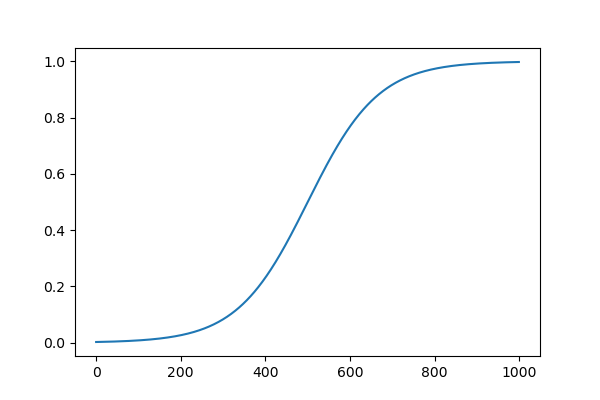

In [3]:
# Acquire the sigmoid value f(x) from:
# f(x) = (x + max_exp) * (exp_table_size / max_exp / 2);
def sigmoid(exp_table_size=1000, max_exp=6):
    exp_table = np.zeros(exp_table_size)
    for i in range(exp_table_size):
        expval = np.exp((i / exp_table_size * 2 - 1) * max_exp)
        exp_table[i] = expval / (expval + 1)
    return exp_table

def display(x, y):
    plt.figure()
    plt.plot(x, y)
    plt.show()
    
t = np.arange(0.0, 1000, 1)
y = sigmoid()
display(t, y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
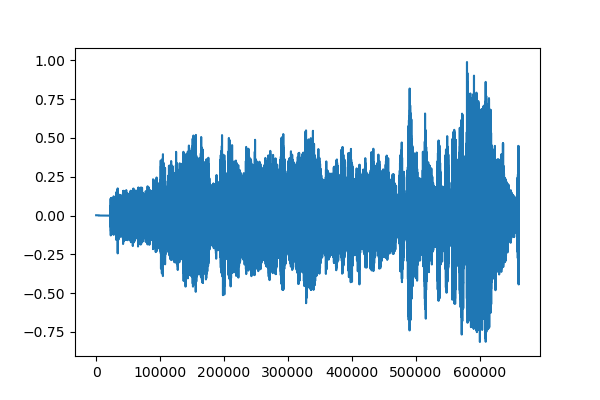

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
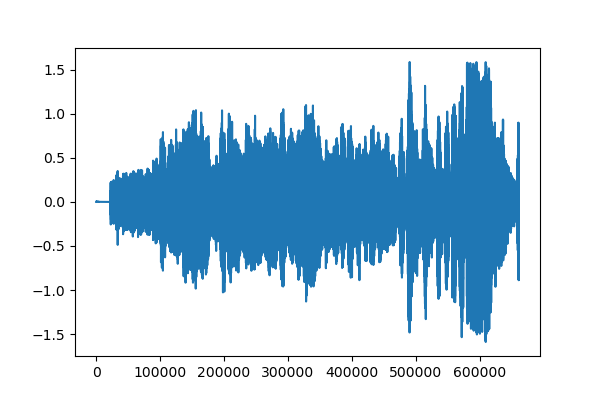

In [4]:
t = np.arange(0, len(normalizedSignal))
display(t, normalizedSignal)
soft_clipped = dsp.overdrive(normalizedSignal, threshold = 0.8)
display(t, soft_clipped)

In [5]:
wavfile.write('overdrive.wav', Fs, soft_clipped)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
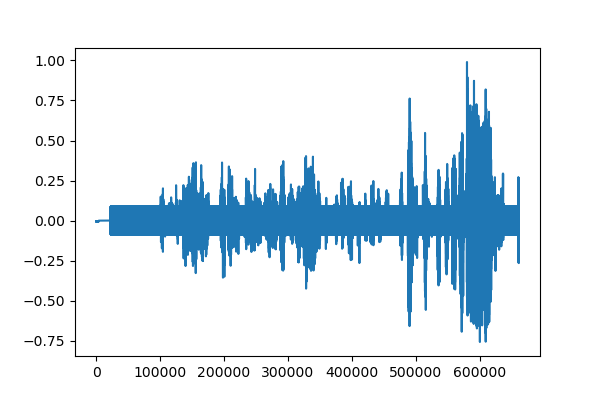

In [6]:
fuzz_sig = dsp.normalize(dsp.fuzz(normalizedSignal))
display(t, fuzz_sig)

In [7]:
wavfile.write('fuzz.wav', Fs, fuzz_sig)

In [8]:
def wah(signal, Fs = 48000):
    # effect coefficients
    # dampening factor - proportional to pass band
    damp = 0.05
    # bandpass cut-off frequencies
    minf = 500
    maxf = 3000
    # wah frequency (how many Hz per second are cycled through)
    Fw = 2000
    # change in centre frequency per sample (Hz)
    delta = Fw/Fs
    num = int((maxf-minf)/delta)
    # create triangle wave of centre frequency values
    Fc = np.linspace(minf, maxf, num)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
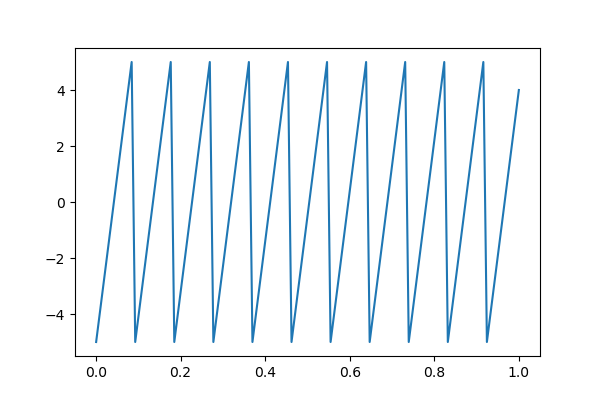

In [9]:
damp = 0.05
# bandpass cut-off frequencies
minf = 500
maxf = 3000
# wah frequency (how many Hz per second are cycled through)
Fw = 2000
# change in centre frequency per sample (Hz)
delta = Fw/Fs
num = int((maxf-minf)/delta)
# create triangle wave of centre frequency values
Fc = np.linspace(minf, maxf, num)

x = dsp.sawtooth(5, 120)
t = np.linspace(0, 1, len(x))
display (t, x)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
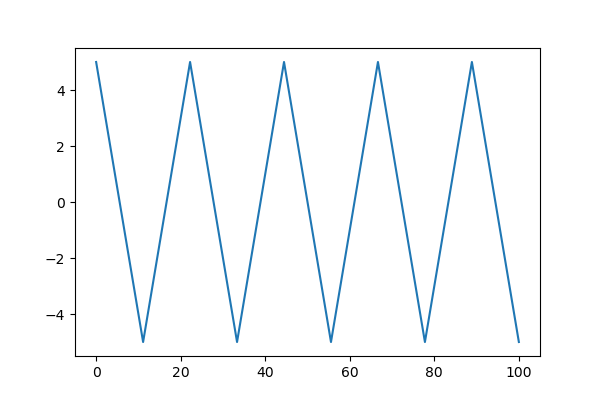

In [10]:
x = dsp.triangle(5, 10)
t = np.linspace(0, 100, len(x))
display (t, x)

In [11]:
x = dsp.tremolo(normalizedSignal, rate = 0.6, depth = 0.7)

#display(np.arange(len(x)),x)

wavfile.write('tremolo.wav', Fs, x)

In [12]:
for i in range(3):
    x = dsp.ring_modulator(normalizedSignal, i)
    wavfile.write('ring_modulator_{}.wav'.format(i), Fs, x)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
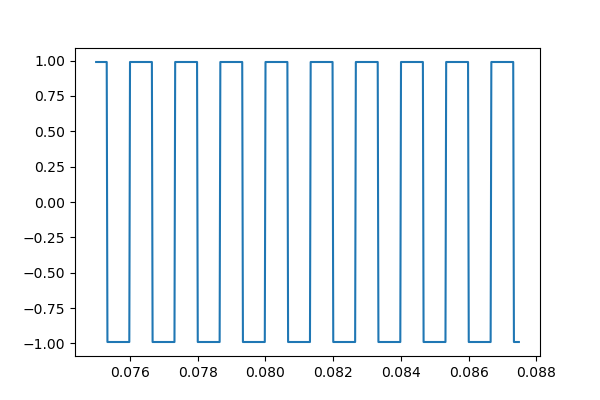

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
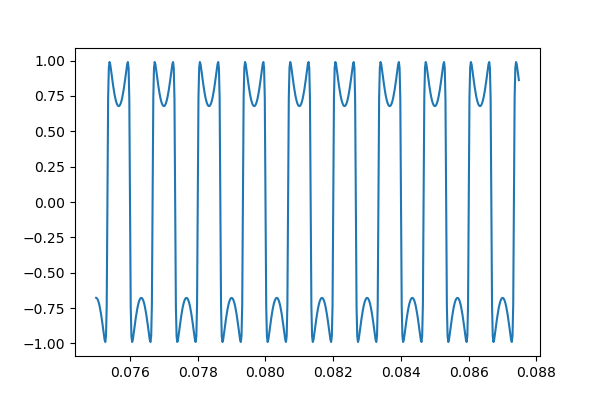

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
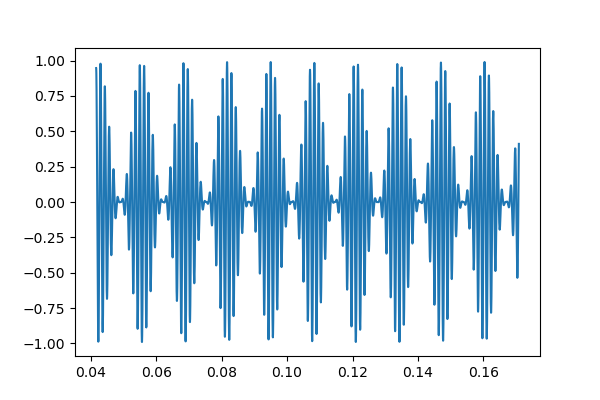

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
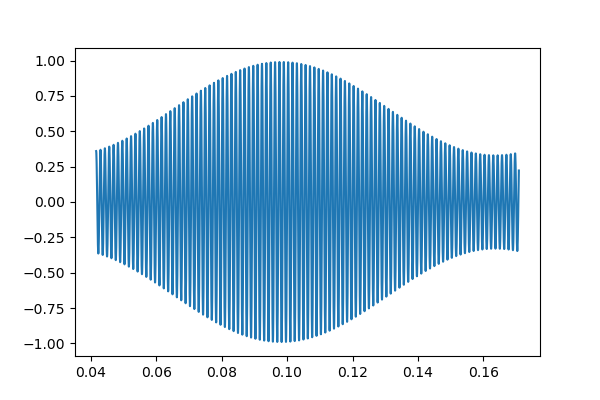

In [13]:
x = dsp.sine_wave(1, 3000, 48000, 5)
t = dsp.time(x, 48000)

y = dsp.normalize(dsp.overdrive(x, 0))
display(t[3600:4200], y[3600:4200])

y = dsp.normalize(dsp.fuzz(x, gain=11, mix = 0.7))
display(t[3600:4200], y[3600:4200])


y = dsp.normalize(dsp.ring_modulator(x, 0, rate=.5, blend=.5))
display(t[2000:8200], y[2000:8200])
#display(t, y)

y = dsp.normalize(dsp.tremolo(x, rate=0.5, depth=.5))
display(t[2000:8200], y[2000:8200])
